## Forecasting Vaccine Uptake: A Data-Driven Approach

![image](H1N1.jpg)

## Author : MIKE KIPTOCH

## NoteBook Structure
i) Business Understanding<br>
ii) Data Understanding<br>
iii) Data Preparation<br>
iv) Modeling<br>
v) Evaluation<br>
vi) Conclusion<br>
vii) Recommendation<br>
v) Next Steps<br>

## Business Understanding

Vaccination stands as one of humanity's greatest achievements in public health, having effectively eradicated or controlled numerous diseases. However, recent years have witnessed a concerning rise in vaccine skepticism, leading to declining immunization rates and outbreaks of preventable diseases. Understanding the factors driving vaccine hesitancy and predicting vaccination uptake is imperative for public health officials and policymakers.

This project leverages data from the National Flu Survey (NHFS 2009) to predict individuals' likelihood of receiving the H1N1 flu vaccine. By examining past vaccination patterns, the study aims to shed light on contemporary vaccination behaviors, particularly pertinent in the context of emerging pandemics like COVID-19.

## Problem Statement

Vaccine hesitancy poses a significant challenge to public health efforts, leading to decreased immunization rates and increased vulnerability to infectious diseases. Understanding the factors influencing individuals' decisions regarding vaccine uptake is crucial for designing effective interventions and promoting community immunity. In this context, the project aims to predict the likelihood of individuals receiving the H1N1 flu vaccine using machine learning techniques and data from the National Flu Survey (NHFS 2009).

## Objectives

- Prediction: Develop machine learning models to predict individuals' H1N1 vaccine uptake based on demographic, socio-economic, and attitudinal factors.

- Identify Influential Factors: Determine the most influential factors affecting H1N1 vaccine acceptance, including doctor recommendations, health insurance coverage, perceptions of vaccine effectiveness, and risk perceptions related to H1N1.

- Model Evaluation: Assess the performance of different machine learning algorithms, including Decision Tree Classifier, Logistic Regression, Random Forest, K-Nearest Neighborhood Classifier, Gradient Boosting Classifier, and XG Boosting Classifier, in predicting H1N1 vaccine uptake.

- Impact Analysis: Analyze the implications of the predictive models and identify actionable insights for public health professionals and policymakers to improve vaccination rates.

## Description of Data Source

The dataset utilized in this project comprises 10 columns and 26,708 rows, sourced from Kaggle. This dataset originates from the National Flu Survey (NHFS) of 2009, a comprehensive survey conducted to understand public attitudes and behaviors regarding influenza vaccination, specifically targeting the H1N1 flu vaccine.

## Data Preparation

In [164]:
# Relevant Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from matplotlib.ticker import FixedLocator

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer



from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost     # extreme gradient boosting

# To visualize the 100 many the columns in data
pd.options.display.max_columns=100

In [165]:
# Load the dataset

df= pd.read_csv('H1N1_Flu_Vaccines.csv')

In [166]:
#display the 10  rows
df.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp,0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0


In [167]:
# The target (seasonal flu rate) is explored
df['seasonal_vaccine'].value_counts(normalize=True)

seasonal_vaccine
0    0.534392
1    0.465608
Name: proportion, dtype: float64

In [168]:
# The percentage breakdown of the two classes in a possible target (H1N1 flu rate) is explored.
df['h1n1_vaccine'].value_counts(normalize=True)   # A class imbalance problem is observed.

h1n1_vaccine
0    0.787546
1    0.212454
Name: proportion, dtype: float64

In [169]:
# check the shape
df.shape

(26707, 38)

In [170]:
# check data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [171]:
#checking value counts
vaccine_counts_h1n1 = df['h1n1_vaccine'].value_counts()
vaccine_counts_seasonal = df['seasonal_vaccine'].value_counts()

print("Value Counts for h1n1_vaccine:\n", vaccine_counts_h1n1)
print("\nValue Counts for seasonal_vaccine:\n", vaccine_counts_seasonal)


Value Counts for h1n1_vaccine:
 h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

Value Counts for seasonal_vaccine:
 seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64


H1N1 Flu Vaccine:

- 21,033 respondents did not receive the H1N1 flu vaccine.
- 5,674 respondents received the H1N1 flu vaccine.
Seasonal Flu Vaccine:

- 14,272 respondents did not receive the seasonal flu vaccine.
- 12,435 respondents received the seasonal flu vaccine.

- The value counts indicate that the distribution of respondents across the "seasonal_vaccine" classes is more balanced compared to the distribution across the "h1n1_vaccine" classes.

In [172]:
# description of data
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


## EDA

The visualizations provided represent the top four most influential features in determining vaccination status for H1N1.

In [173]:
# A copy of the main dataframe is created to be used for visualizations
df2 = df.copy()

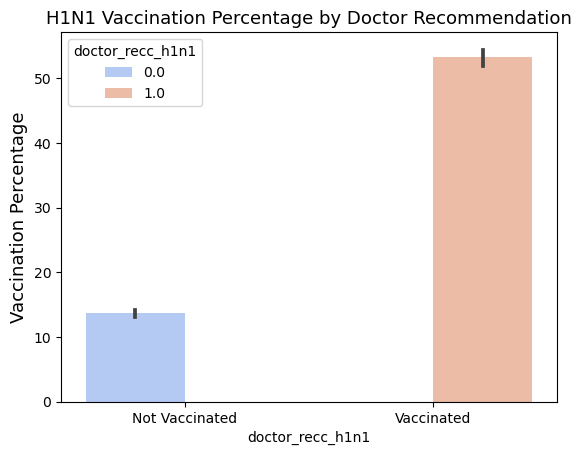

In [174]:


# A graph is created to visualize the relationship between H1N1 vaccination and doctor recommendation
dr = sns.barplot(x=df2['doctor_recc_h1n1'].dropna(), y=df2['h1n1_vaccine']*100, hue=df2['doctor_recc_h1n1'], palette='coolwarm')

# Set the tick positions on the x-axis
dr.set_xticks([0, 1])

# The x-axis tick labels are adjusted to 'Not Vaccinated' and 'Vaccinated'
dr.set_xticklabels(['Not Vaccinated', 'Vaccinated'])

# The y-axis label is set to 'Vaccination Percentage' with a font size of 13
dr.set_ylabel('Vaccination Percentage', fontsize=13)

# The title of the graph is set to 'H1N1 Vaccination Percentage by Doctor Recommendation' with a font size of 13
dr.set_title('H1N1 Vaccination Percentage by Doctor Recommendation', fontsize=13)

plt.show()


In [175]:
# A dictionary is created for mapping in order to generate better names for the x-axis in the graphs below
ins_dict = {1: 'Health Insurance',
            0: 'No Health Insurance'}

In [176]:
# The column used to create clear x-axis tick marks in the graph below is created by replacing the health insurance words in 'df2' with the values from 'ins_dict'
df2['health_ins_words'] = df2['health_insurance'].replace(ins_dict)

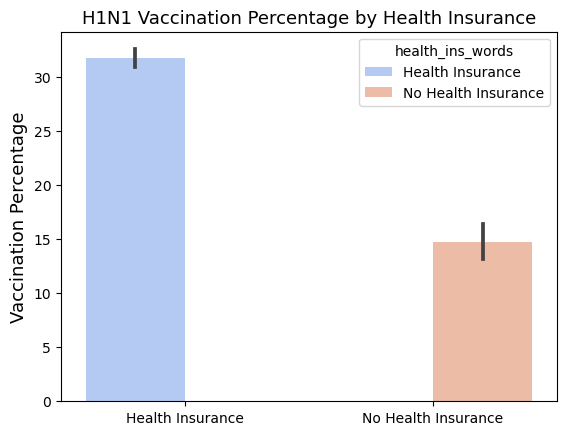

In [177]:

# A bar plot is created to visualize the relationship between health insurance and H1N1 vaccination percentage
ins = sns.barplot(x=df2['health_ins_words'], y=df2['h1n1_vaccine']*100, hue=df2['health_ins_words'], palette='coolwarm')

# The x-axis label is set to empty
ins.set_xlabel('')

# The y-axis label is set to 'Vaccination Percentage' with a font size of 13
ins.set_ylabel('Vaccination Percentage', fontsize=13)

# The title of the plot is set to 'H1N1 Vaccination Percentage by Health Insurance' with a font size of 13
ins.set_title('H1N1 Vaccination Percentage by Health Insurance', fontsize=13)

plt.show()


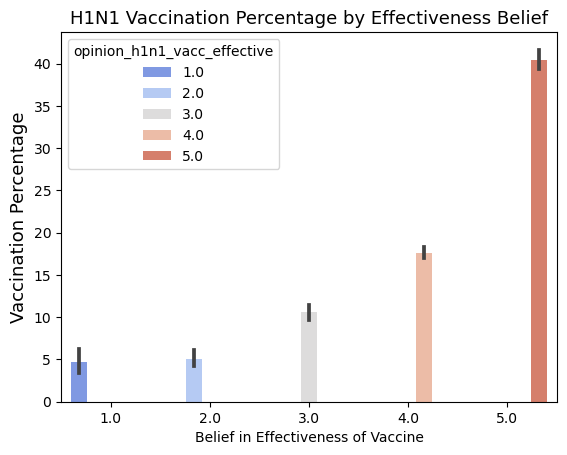

In [178]:
# A graph is created to show the differentiation in vaccine percentage depending on the opinion of effectiveness of H1N1 Vaccine
ins = sns.barplot(x=df2['opinion_h1n1_vacc_effective'].dropna(), y=df2['h1n1_vaccine']*100, hue=df2['opinion_h1n1_vacc_effective'], palette='coolwarm')

# The x-axis label is set to 'Belief in Effectiveness of Vaccine'
ins.set_xlabel('Belief in Effectiveness of Vaccine')

# The y-axis label is set to 'Vaccination Percentage'
ins.set_ylabel('Vaccination Percentage', fontsize=13)

# The title of the graph is set to 'H1N1 Vaccination Percentage by Effectiveness Belief'
ins.set_title('H1N1 Vaccination Percentage by Effectiveness Belief', fontsize=13)

plt.show()

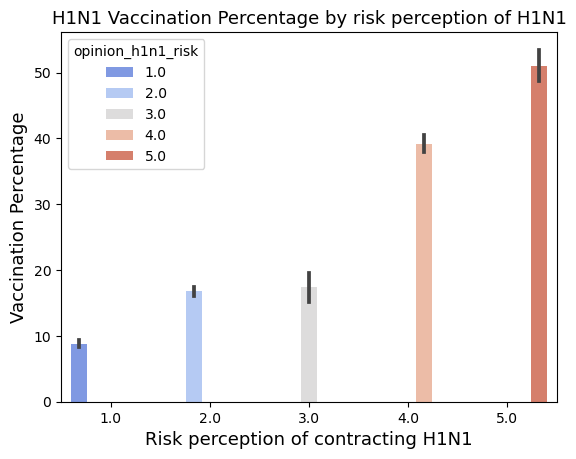

In [179]:
# A risk graph is created to explore vaccine percentage depending on risk perception of H1N1
ins = sns.barplot(x=df2['opinion_h1n1_risk'].dropna(), y=df2['h1n1_vaccine']*100, hue=df2['opinion_h1n1_risk'], palette='coolwarm')

# The x-axis label is set to describe the risk perception of contracting H1N1
ins.set_xlabel('Risk perception of contracting H1N1', fontsize=13)

# The y-axis label is set to describe the vaccination percentage
ins.set_ylabel('Vaccination Percentage', fontsize=13)

# The title of the graph is set to describe the relationship between H1N1 vaccination percentage and risk perception of H1N1
ins.set_title('H1N1 Vaccination Percentage by risk perception of H1N1', fontsize=13)

plt.show()

##  Data Preparation


The dataset underwent several preparatory steps to facilitate analysis. Initially, two columns, "respondent_id" and "seasonal_vaccine," were dropped as they were considered irrelevant. Categorical columns were transformed using OneHotEncoder, generating new columns to represent each category. Missing values were filled using Iterative Imputer, a method chosen for its effectiveness with complex datasets. For columns with over 10 unique categories, category names were replaced with frequency counts using CountEncoder. Pipelines were utilized to streamline the preprocessing and modeling processes, reducing the risk of data leakage. Additionally, the dataset was split into training and testing sets twice to ensure the availability of a holdout set for evaluating the final model's generalizability.

In [180]:
# X and y are defined
X = df.drop(columns=['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y = df['h1n1_vaccine']

In [181]:
# Data is split into training and holdout sets
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [182]:
# Train and test sets are split using regular train-test split method
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

Used the stratify argument for y (our target) in both splits to help deal with the class imbalance problem.

In [183]:
# Lists are set up for each column datatype
num_cols = []
ohe_cols = []
freq_cols = []

# Iterate over each column to categorize them based on their datatype
for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        # If the datatype of the column is numeric,
        # it is appended to the list of numeric columns
        num_cols.append(c)
    elif X[c].nunique() < 10:
        # If the number of unique values in the column is less than 10,
        # it is considered categorical and appended to the list of one-hot encoded columns
        ohe_cols.append(c)
    else:
        # Otherwise, the column is considered categorical with many unique values
        # and is appended to the list of frequency encoded columns
        freq_cols.append(c)



# Each column category is displayed
print(f'Numerical Columns:', num_cols)
print('\n')
print(f'Object Columns (containing less than 10 unique values):', ohe_cols)
print('\n')
print(f'Object Columns (containing more than 10 unique values):', freq_cols)

Numerical Columns: ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


Object Columns (containing less than 10 unique values): ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']


Object Columns (containing more than 10 unique values): ['hhs_geo_region', 'employment_industry', 'employment_occupation']


Pipelines for preprocessing

In [184]:
# Pipelines 
num_transformer = Pipeline(steps=[
    ('num_imputer', IterativeImputer(max_iter=100, random_state=42)),   # Missing values are replaced with IterativeImputer
    ('minmaxscaler', MinMaxScaler())                                    # Numerical features are scaled using MinMaxScaler
])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # Missing categories are handled by SimpleImputer
    ('ohe_encoder', OneHotEncoder(handle_unknown='ignore'))                     # Each category is encoded into a new column
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)), # Category names are replaced with frequency counts using CountEncoder
    ('freq_imputer', IterativeImputer(max_iter=100, random_state=42))            # Missing values are replaced with IterativeImputer
])


In [185]:
# The preprocessor is defined using a ColumnTransformer, which packages all components together
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)
    ])

In [186]:
# The preprocessor is fitted to observe the components as a whole
preprocessor.fit(X_tr)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['h1n1_concern', 'h1n1_knowledge',
                                  'behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral...
                                 ['age_group', 'education', 'race', 'sex',
                                  'income_poverty', 'marital_status',
                                  'rent_or_own', 'employment_status',
                                  'census_msa']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42))]),
                                 ['hhs_geo_region', 'employment_industry',
                                  'employment_occupation'])])

In [187]:
# Let's observe what the data looks like after the preprocessor transformation
X_tr_transformed = preprocessor.transform(X_tr)
# The shape of the transformed data is examined
X_tr_transformed_shape = X_tr_transformed.shape

In [188]:
# To visualize it, a Pandas dataframe is used. 
pd.DataFrame(X_tr_transformed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,1.000000,0.5,0.016076,0.963804,0.038064,0.894508,0.0,1.000000,0.0,0.116478,0.141558,1.0,0.0,1.000000,0.779010,0.75,0.296807,0.75,0.75,0.279800,0.75,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.106407,0.499168,0.504213
1,0.666667,1.0,0.016076,0.000000,0.038064,0.894508,0.0,0.013143,1.0,0.116478,0.141558,0.0,0.0,0.110629,0.920662,0.75,0.765602,0.25,0.75,0.759933,0.25,0.333333,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.160235,0.340961,0.371854
2,0.333333,0.5,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,0.0,1.000000,1.000000,0.0,0.0,0.110629,0.920662,0.75,0.296807,0.00,1.00,0.279800,0.00,0.333333,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.076659,0.499168,0.504213
3,0.333333,0.5,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,1.0,0.116478,1.000000,0.0,0.0,0.110629,0.920662,0.75,0.296807,0.25,0.75,0.279800,0.25,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.499168,0.504213
4,0.333333,1.0,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,1.0,0.116478,0.141558,0.0,1.0,1.000000,0.920662,0.25,0.062409,0.00,0.75,0.279800,0.25,0.666667,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.340961,0.371854


In each model, the preprocessor will be incorporated into the modeling pipeline to ensure that null values are filled and categorical variables are transformed.

## Modeling


In the modeling phase, various machine learning models were evaluated using GridSearchCV to find the best hyperparameter combinations. Class imbalance was addressed, and performance was assessed using metrics like accuracy, precision, F1 score, and ROC-AUC curves. The Gradient Boosting Classifier was chosen as the final model due to its superior accuracy and precision scores.


### Baseline Understanding

- Let's use DummyClassifier to make prediction based on the most frequent class in the target variable, which is 0 in our case.

In [189]:
def evaluate(estimator, X_train, X_test, y_train, y_test, roc_auc='roc_auc'):
    # Predictions are made on the training and testing data
    train_out = estimator.predict(X_train)
    test_out = estimator.predict(X_test)

    # Training scores are calculated and printed
    print("Training Scores:")
    print(f"Train Accuracy: {accuracy_score(y_train, train_out)}")
    print(f"Train Precision: {precision_score(y_train, train_out, zero_division=0)}")
    print(f"Train Recall: {recall_score(y_train, train_out)}")
    print(f"Train F1-Score: {f1_score(y_train, train_out)}")
    print("*********")

    # Testing scores are calculated and printed
    print("Testing Scores:")
    print(f"Test Accuracy: {accuracy_score(y_test, test_out)}")
    print(f"Test Precision: {precision_score(y_test, test_out, zero_division=0)}")
    print(f"Test Recall: {recall_score(y_test, test_out)}")
    print(f"Test F1-Score: {f1_score(y_test, test_out)}")

    # If ROC-AUC score is not skipped, it is printed
    if roc_auc != 'skip':
        print(f"ROC-AUC: {roc_auc_score(y_test, test_out)}")

    # Confusion matrix is computed and plotted for the test set
    cm = confusion_matrix(y_test, test_out)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xticks(np.arange(len(estimator.classes_)), estimator.classes_, rotation=90)
    plt.yticks(np.arange(len(estimator.classes_)), estimator.classes_)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()


In [190]:
# The dummy model through the pipeline setup
dummy_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy="most_frequent"))
])

In [191]:
# The dummy model fitting
dummy_model.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'rent_or_own',
                                                   'employment_status',
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier', DummyClassifier(strategy='most_frequent'))])

Training Scores:
Train Accuracy: 0.7875494071146245
Train Precision: 0.0
Train Recall: 0.0
Train F1-Score: 0.0
*********
Testing Scores:
Test Accuracy: 0.7874376039933444
Test Precision: 0.0
Test Recall: 0.0
Test F1-Score: 0.0


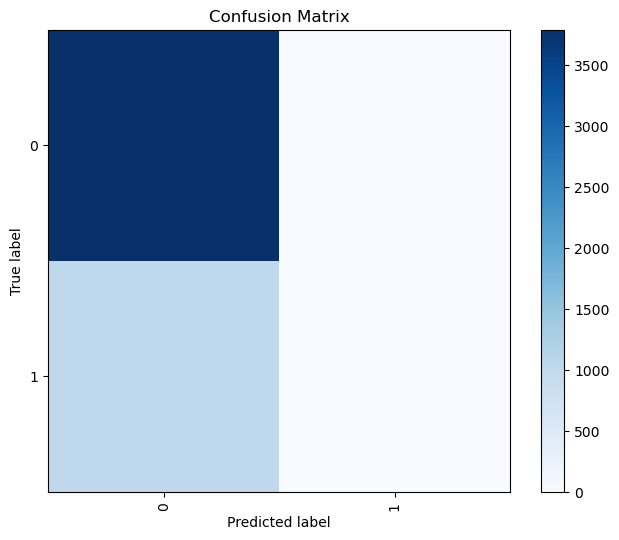

In [192]:
# Dummy model being evaluated
evaluate(dummy_model, X_tr, X_te, y_tr, y_te, roc_auc='skip')

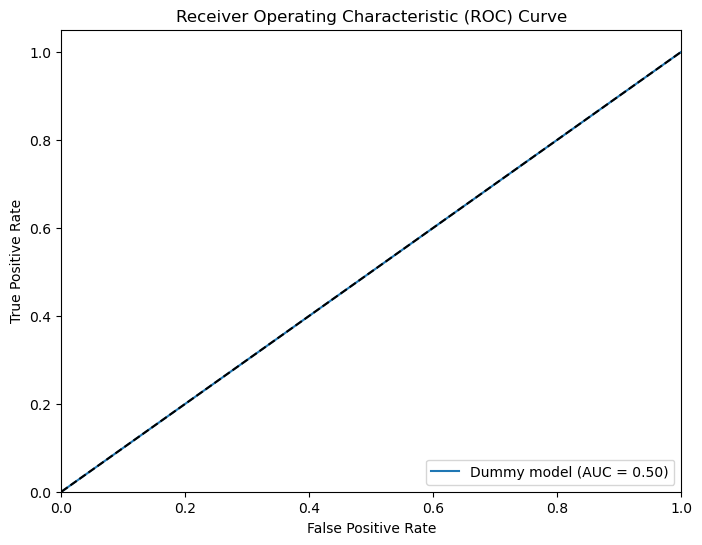

In [193]:
# The roc-auc curve for dummy model plot
def plot_roc_curve(model, X_test, y_test, name='Model'):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(dummy_model, X_tr, y_tr, name='Dummy model'); 

So, the mean of the accuracy score is a little over 78% if we always guess the majority class, which is 0 in this case.

### MODEL 1: Decision Tree Classifier

In [194]:
# The DecisionTreeClassifier to go though the pipeline setup
dtc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(class_weight='balanced', max_depth = 5))
])

# The parameters are chosen based on GridSearchCV 

In [195]:
# The model to the training data is fitted
dtc.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'employment_status',
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5))])

Training Scores:
Train Accuracy: 0.7920220511753693
Train Precision: 0.5071858288770054
Train Recall: 0.7429620563035496
Train F1-Score: 0.6028404012315026
*********
Testing Scores:
Test Accuracy: 0.7886855241264559
Test Precision: 0.5019710906701709
Test Recall: 0.7475538160469667
Test F1-Score: 0.60062893081761


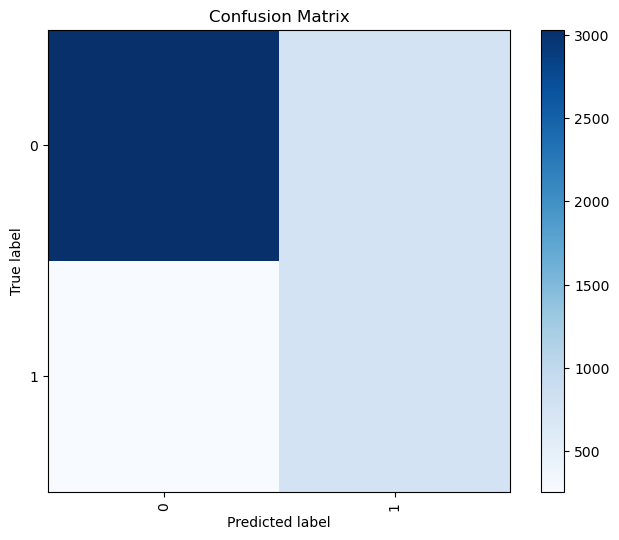

In [196]:
# The decision tree model for various metrics evaluation
evaluate(dtc, X_tr, X_te, y_tr, y_te, roc_auc='skip')

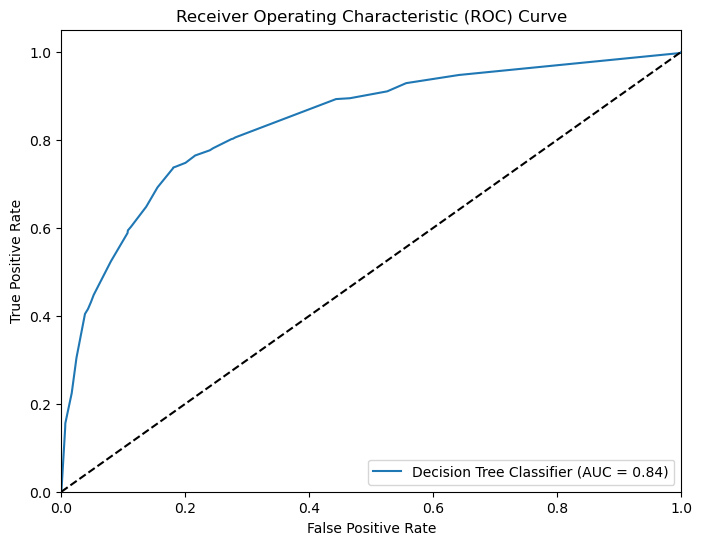

In [197]:
# The roc-auc curve for decision tree model
plot_roc_curve(dtc, X_te, y_te, name='Decision Tree Classifier'); 

This decision tree model is not overfitting, but we have a low precision score, as well as a low f1 score. However, the AUC for this model is 0.84, which is fairly high, meaning that it does an adequate job of maximizing true positives and minimizing the false positives. This model is not overfitting.

### MODEL 2: Logistic Regression

In [198]:
# The logistic regression model to go through the pipeline setup.
logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500, C=1, class_weight= 'balanced', solver= 'lbfgs',           
                                      random_state=42))
])


In [199]:
# The logistic regression model on the training data
logreg.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=500,
                                    random_state=42))])

Training Scores:
Train Accuracy: 0.775691699604743
Train Precision: 0.48176
Train Recall: 0.7370869033047736
Train F1-Score: 0.5826802128688922
*********
Testing Scores:
Test Accuracy: 0.778910149750416
Test Precision: 0.486950986632718
Test Recall: 0.7485322896281801
Test F1-Score: 0.590050134978789
ROC-AUC: 0.767821348194967


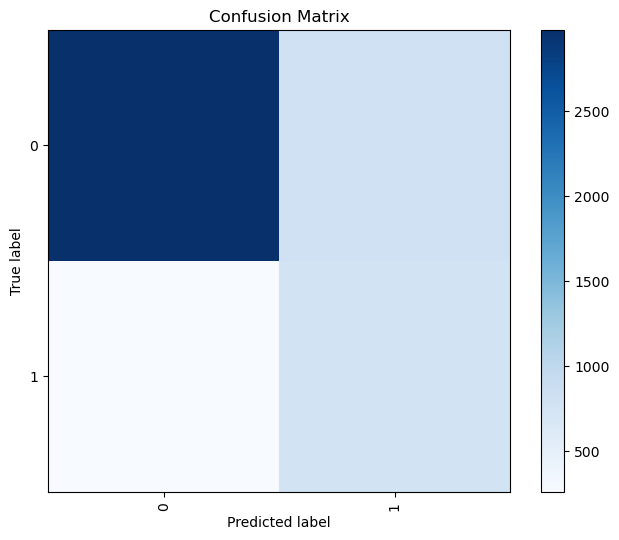

In [200]:
# The logistic regression for various metrics
evaluate(logreg, X_tr, X_te, y_tr, y_te)

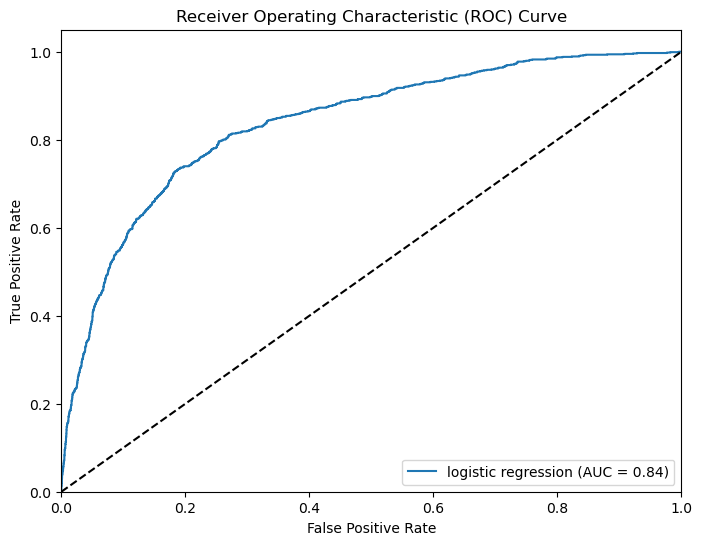

In [201]:
# The roc-auc curve for the logistic regression model is plotted.
plot_roc_curve(logreg, X_te, y_te, name='logistic regression');

This logistic regression model has low precision and fl scores, and has an AUC equal to the decision tree AUC above. This model is not overfitting.

### MODEL 3: Random Forest

In [202]:
# The RandomForestClassifier is configured to pass through the pipeline
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight= 'balanced', max_depth= 5, min_samples_leaf= 1,
                                          n_estimators= 200, random_state=42))
])


In [203]:
# The random forest model is fitted to the training data
rfc.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        n_estimators=200, random_state=42))])

Training Scores:
Train Accuracy: 0.7942583732057417
Train Precision: 0.5107303277324904
Train Recall: 0.7515299877600979
Train F1-Score: 0.6081616481774961
*********
Testing Scores:
Test Accuracy: 0.788269550748752
Test Precision: 0.5013245033112583
Test Recall: 0.7407045009784736
Test F1-Score: 0.5979462875197472
ROC-AUC: 0.7709069256080958


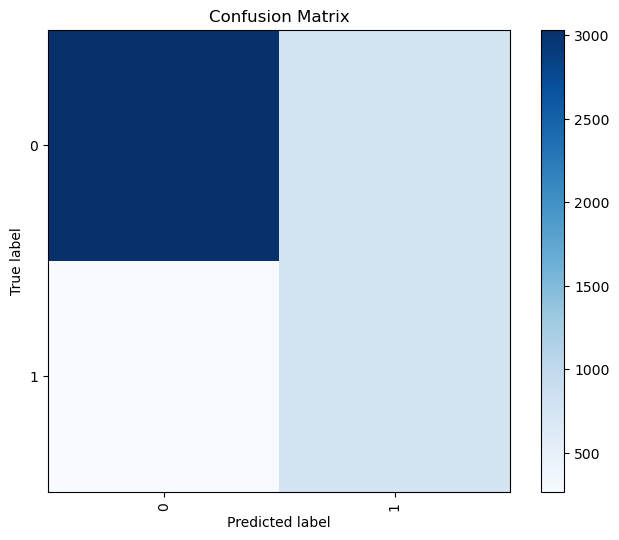

In [204]:
# Various metrics of the random forest classifier are being evaluated
evaluate(rfc, X_tr, X_te, y_tr, y_te)

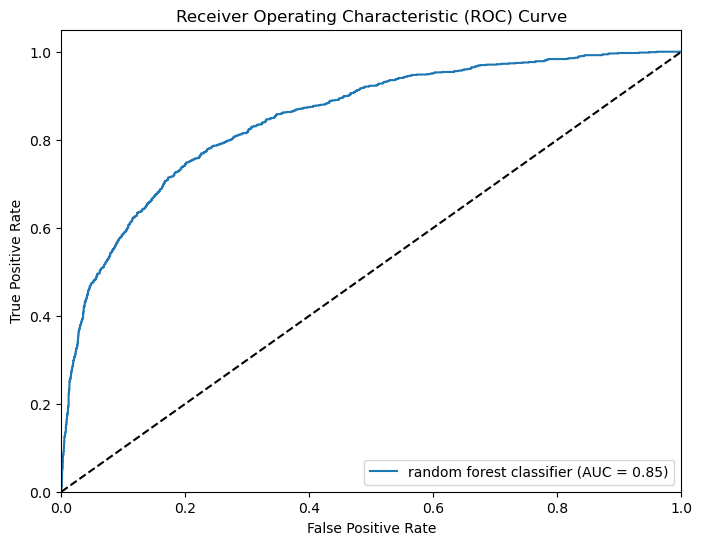

In [205]:
plot_roc_curve(rfc, X_te, y_te, name='random forest classifier');

This random forest classifier model also has low precision and fl scores. It has an AUC score of 0.85, which is slightly better than the decision tree model above. This model is not overfitting to a great extent.

### MODEL 4: kNN Classifier

In [206]:
# The KNN model is set up to go through the pipeline
kNN = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5, p=1, weights='distance'))
])


In [207]:
# The KNN model is fitted to the training data
kNN.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'rent_or_own',
                                                   'employment_status',
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier', KNeighborsClassifier(p=1, weights='distance'))])

Training Scores:
Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1-Score: 1.0
*********
Testing Scores:
Test Accuracy: 0.7999168053244592
Test Precision: 0.5622406639004149
Test Recall: 0.2651663405088063
Test F1-Score: 0.3603723404255319
ROC-AUC: 0.6047173488069653


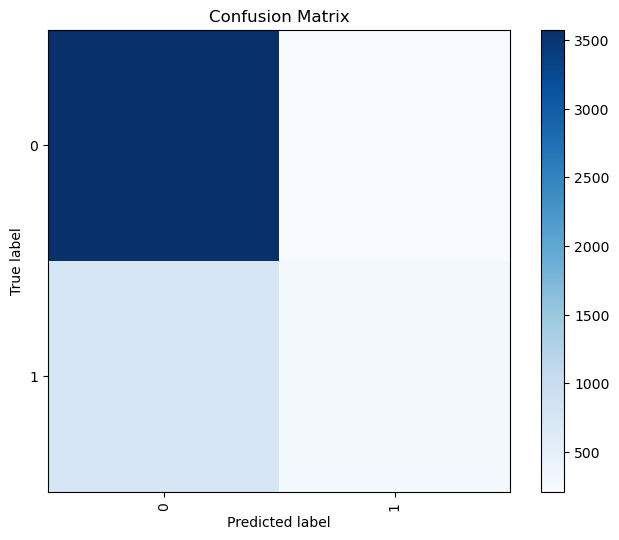

In [208]:
# The KNN model is evaluated for various metrics
evaluate(kNN, X_tr, X_te, y_tr, y_te)

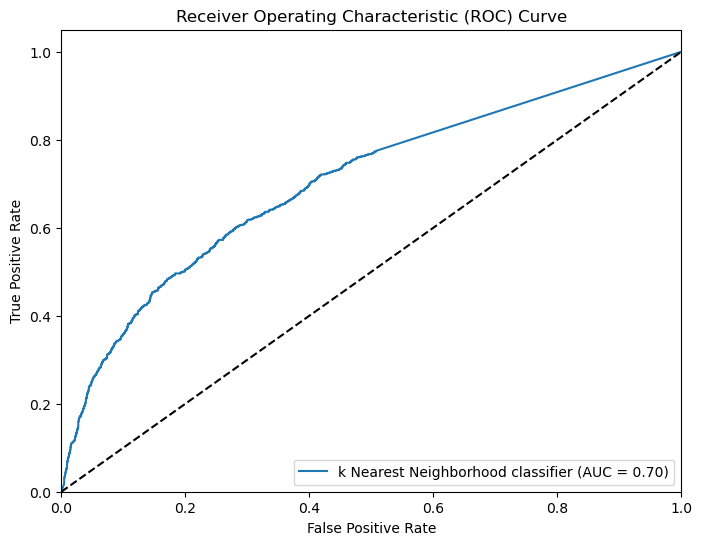

In [209]:
# The roc-auc curve is plotted for the KNN model
plot_roc_curve(kNN, X_te, y_te, name='k Nearest Neighborhood classifier');

This KNN model is definitely overfitting; the training data has perfect scores for all metrics, whereas the testing data scores are much lower. The AUC score is also much lower than on previous models.

### MODEL 5: Gradient Boosting Classifier

In [210]:
# The gradient boosting classifier is configured to pass through the pipeline
gbc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 200,
        random_state=42))
])


In [211]:
# The gradient boosting classifier is fitted to the training data
gbc.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 GradientBoostingClassifier(max_depth=5, n_estimators=200,
                                            random_state=42))])

Training Scores:
Train Accuracy: 0.895933014354067
Train Precision: 0.8400783289817232
Train Recall: 0.630110159118727
Train F1-Score: 0.7201007133864876
*********
Testing Scores:
Test Accuracy: 0.8554492512479202
Test Precision: 0.7224489795918367
Test Recall: 0.5195694716242661
Test F1-Score: 0.6044393853158794
ROC-AUC: 0.7328433728961267


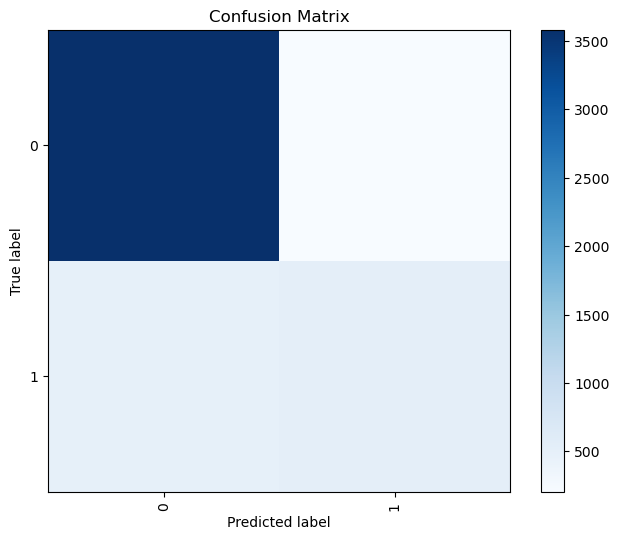

In [212]:
# The gradient boosting model is evaluated for various metrics
evaluate(gbc, X_tr, X_te, y_tr, y_te)

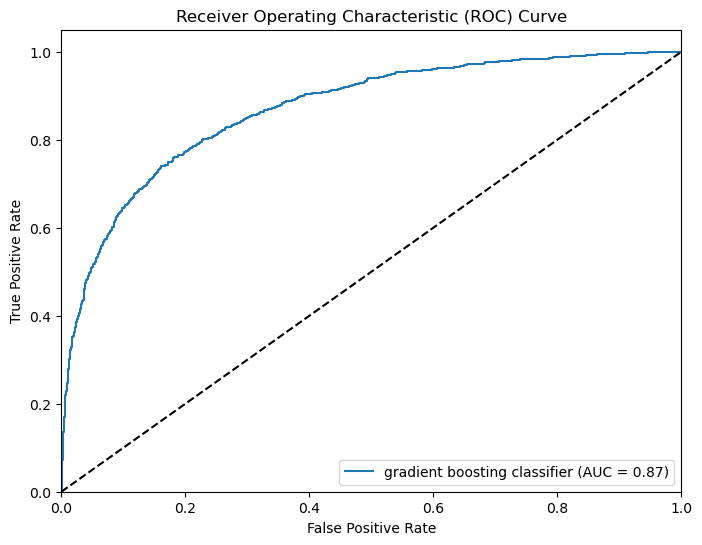

In [213]:
# The ROC-AUC curve for the gradient boosting model is plotted
plot_roc_curve(gbc, X_te, y_te, name='gradient boosting classifier');

This model has the highest overall scores of all the models done so far, and also does the best job of minimizing the false positives. This is our candidate for the final model.

### MODEL 6: XG Boosting Classifier

In [214]:
# The XG Boosting model is configured to go through the pipeline
xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgboost.XGBClassifier(learning_rate= 1, max_depth= 2, n_estimators= 100, random_state=42))
])


In [215]:
# The XGBoosting model is fitted to the training data
xgb.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

Training Scores:
Train Accuracy: 0.8637923861035989
Train Precision: 0.7505126452494874
Train Recall: 0.5375764993880049
Train F1-Score: 0.6264441591784339
*********
Testing Scores:
Test Accuracy: 0.8560732113144759
Test Precision: 0.722972972972973
Test Recall: 0.5234833659491194
Test F1-Score: 0.6072644721906924
ROC-AUC: 0.7346682545540631


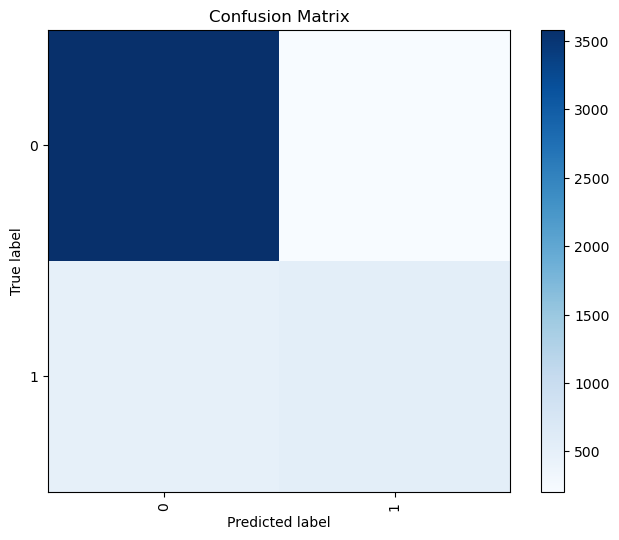

In [216]:
# XG Boost model is evaluated for various metrics
evaluate(xgb, X_tr, X_te, y_tr, y_te)

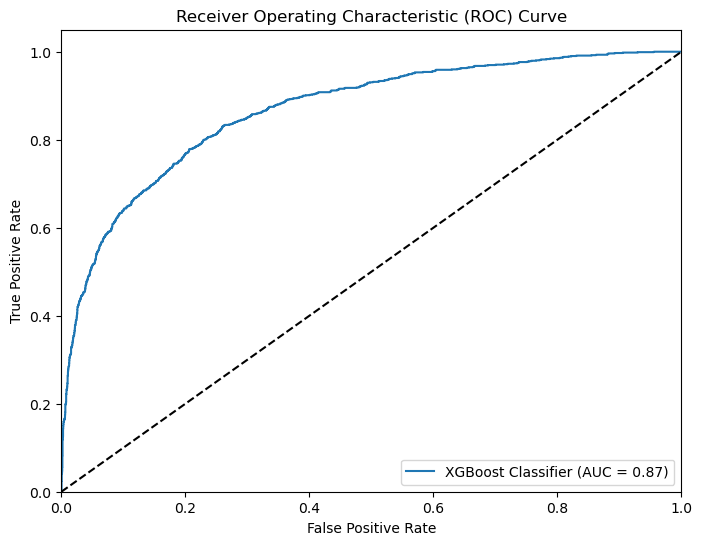

In [217]:
plot_roc_curve(xgb, X_te, y_te, name='XGBoost Classifier');

This model gave similar scores to the gradient boosting model, but the gradient boosting model has the best AUC score and precision score. So, I will choose the gradient boosting classifier as the final model.

## Comparison of Model ROC Curves

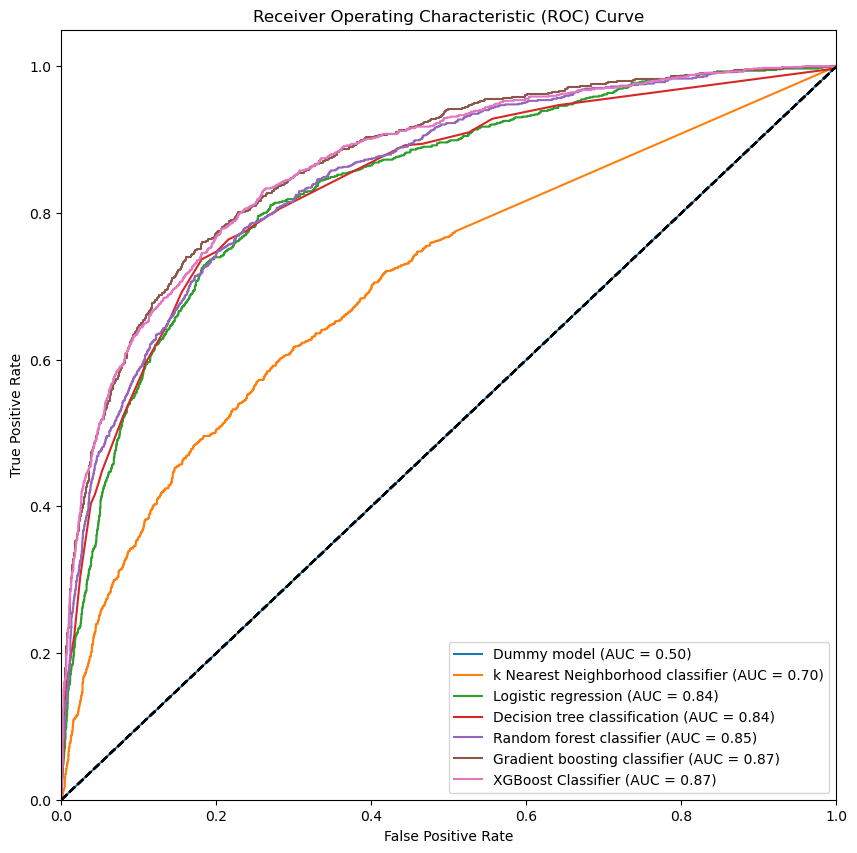

In [218]:
def plot_roc_curve(model, X_test, y_test, name='Model', ax=None):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))

    ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax.legend(loc="lower right")

    if ax is None:
        plt.show()


fig, ax = plt.subplots(figsize=(10, 10))
plot_roc_curve(dummy_model, X_te, y_te,
               name='Dummy model', ax=ax)
plot_roc_curve(kNN, X_te, y_te, 
               name='k Nearest Neighborhood classifier', ax=ax)
plot_roc_curve(logreg, X_te, y_te, 
               name='Logistic regression', ax=ax)
plot_roc_curve(dtc, X_te, y_te,
               name='Decision tree classification', ax=ax)
plot_roc_curve(rfc, X_te, y_te, 
               name='Random forest classifier', ax=ax)
plot_roc_curve(gbc, X_te, y_te, 
               name='Gradient boosting classifier', ax=ax)
plot_roc_curve(xgb, X_te, y_te, 
               name='XGBoost Classifier', ax=ax);

###  Gradient Boosting Classifier

After comparing the ROC curves and analyzing the confusion matrix, I concluded that the Gradient Boosting Classifier is the most suitable choice for my final model.

In [219]:
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, 
                                              max_depth=5,
                                              random_state=42))
])


In [220]:
output_final_model = final_model.fit(X_tr, y_tr)

Training Scores:
Train Accuracy: 0.895933014354067
Train Precision: 0.8400783289817232
Train Recall: 0.630110159118727
Train F1-Score: 0.7201007133864876
*********
Testing Scores:
Test Accuracy: 0.8476226132534631
Test Precision: 0.7051282051282052
Test Recall: 0.48500881834215165
Test F1-Score: 0.5747126436781609
ROC-AUC: 0.7151755118326728


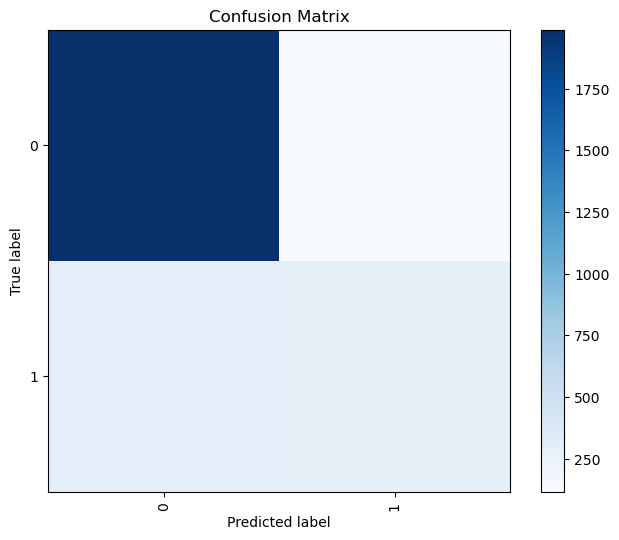

In [221]:
evaluate(final_model, X_tr, X_hold, y_tr, y_hold)

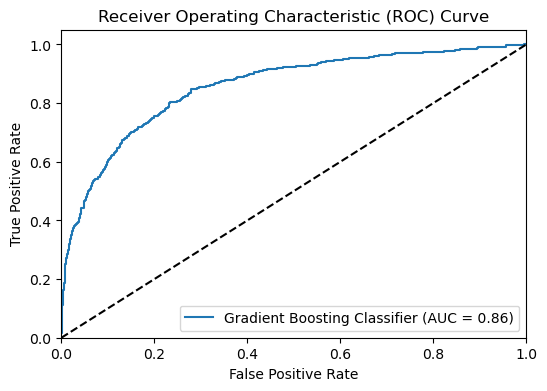

In [222]:
plot_roc_curve(final_model, X_hold, y_hold, name='Gradient Boosting Classifier');

In [223]:
# Predictions for the confusion matrix can be calculated
hold_preds_final_model = final_model.predict(X_hold)
# Confusion matrix can be computed using the predicted and actual labels
cm = confusion_matrix(y_hold, hold_preds_final_model, normalize='true')

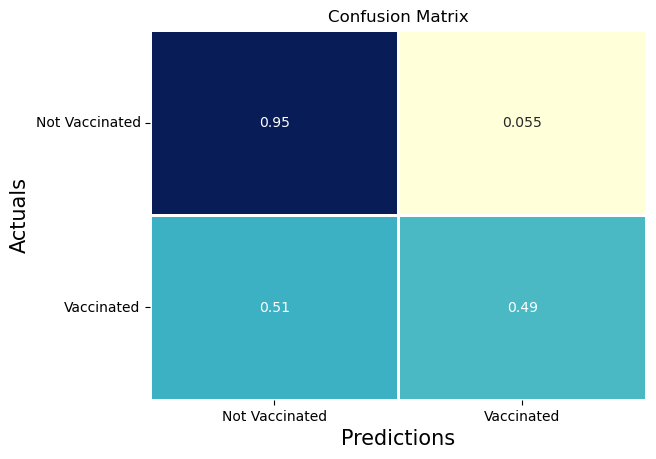

In [224]:
# A heatmap is plotted for the final model's confusion matrix to enhance visualization 
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cbar=False, linewidths=1, cmap="YlGnBu");  

# Title and axis labels are set for the confusion matrix plot
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predictions', fontsize=15)
ax.set_ylabel('Actuals', fontsize=15)

# Tick labels for x and y axes are set
ax.xaxis.set_ticklabels(['Not Vaccinated', 'Vaccinated'])
ax.yaxis.set_ticklabels(['Not Vaccinated', 'Vaccinated'], rotation=0, fontsize=10);

## Evaluation